In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import glob
import os
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [28]:
path ="/data/disang/WRF/data/MOD/nc/"
pdir ="/data/disang/WRF/data/MOD/nc/im/"

filelist = glob.glob(os.path.join(path,'MYD04_L2.A2018148*.nc'))

l1 = len(filelist)
n = -1
toutput_a1 = np.zeros((l1,542,669), dtype=np.float32)

In [29]:
for file in filelist:
    filename = os.path.basename(file)
#     filename1 = filename.split('WA2')[1]
#     time = datetime.datetime.strptime(filename1.split('.nc')[0],'%Y-%m-%d %H:%M:%S')
    # orbit = filename.split('-')[3][0:6]
    n = n + 1
    print(str(n))


    with Dataset(file, mode='r') as ncfile:

        # Extract the pressure, geopotential height, and wind variables
        lats  = ncfile["lat"][:,:]
        lons  = ncfile["lon"][:,:]

        aod1 = ncfile["AOD"][:,:]
        
        if n < l1:
            toutput_a1[n,:,:] = aod1[:,:]
            
aod = np.nanmean(toutput_a1,axis=0)

fig = plt.figure(figsize=(12,7))

cmap1 = mpl.cm.turbo
#cmap1 = mpl.cm.RdYlBu_r


###
p = ccrs.LambertConformal(central_longitude=43.96, central_latitude=63.353)
# projection = ccrs.LambertConformal(central_longitude=np.mean(bounds_lon), \
#                             central_latitude=np.mean(bounds_lat))

ax = fig.add_subplot(1, 1, 1, projection=p)
#ax.set_extent([40, 90, 30, 60], crs=ccrs.PlateCarree())
####test domain
#ax.set_extent([47.1, 70, 34.5, 52], crs=ccrs.PlateCarree())
# ax.set_extent([47.1, 73, 34.5, 52], crs=ccrs.PlateCarree())
# ax.set_extent([48, 81.5, 34, 56], crs=ccrs.PlateCarree())
# ax.set_extent([48, 56, 40, 48], crs=ccrs.PlateCarree())


### plot the frequency map
levels = np.linspace(0.05, 3.05, num=100, endpoint=False)
labels = levels


im = ax.contourf(lons, lats, aod,
                          levels=levels,###vmin vamx
                          cmap=cmap1,
                          transform=p, extend='max')

ax.add_feature(cfeature.COASTLINE.with_scale('10m'),linewidth=.7,edgecolor='k',alpha=.5,zorder=100)
# ax.add_feature(states_provinces,linewidth=.3,linestyle='--',edgecolor='k',alpha=.5,zorder=100)
ax.add_feature(cfeature.LAKES.with_scale('10m'),linewidth=.7,facecolor='none',edgecolor='k',alpha=.5,zorder=100)
ax.add_feature(cfeature.BORDERS.with_scale('10m'),color='blue',linewidth=1,linestyle='--',edgecolor='k',alpha=.5,zorder=100)
# ax.set_title('Windspeed'+str(time),fontsize=14)
#         ax.text(69.3,51.2,'Total mass: 1.55e8 ton \nMax value: 11.61',size=11, color='r',transform=ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True,dms=True, x_inline=False, y_inline=False, linewidth=.5, color='gray', alpha=0.5, linestyle='--')

gl.right_labels = False
gl.top_labels = None
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {'size': 10.5,'color': 'black'}
gl.xlabel_style = {'size': 10.5,'color': 'black','rotation':'horizontal','ha':'center'}
###,'verticalalignment':'center_baseline','rotation_mode':'anchor'

cb3 = plt.colorbar(im, cmap=cmap1,fraction=0.034, pad=0.038,aspect=30,extend='max',
                               orientation='horizontal')
# cb3.set_label('wind speed')
#cb3.tick_params(labelsize=11)
#cb3.set_label('Total surface emission/kg m^-2',size=12)


plt.title("MODIS AOD")



#plt.savefig(pdir+'Total_GOCART_no_min.png',bbox_inches="tight",dpi=800)
#plt.close(fig)

0
1
2
3


/tmp/ipykernel_168214/1829721917.py:21: RuntimeWarning: Mean of empty slice
  aod = np.nanmean(toutput_a1,axis=0)


NameError: name 'bounds_lon' is not defined

<Figure size 1200x700 with 0 Axes>

In [15]:
aod

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

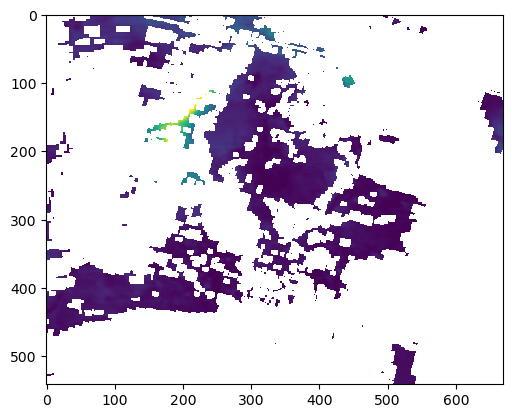

In [16]:
plt.imshow(aod)